In [1]:
#Import necessary libraries

# import pandas
import pandas as pd

#import Numpy-Numerical Python

import numpy as np

# import subpackage of matplotlib 

import matplotlib.pyplot as plt

#import seaborn

import seaborn as sns

# Display all columns
pd.set_option("display.max_columns", None)
#Display all rows
pd.set_option("display.max_rows", None)


# to avoid warnings

from warnings import filterwarnings
filterwarnings("ignore") 

In [2]:
## Import the data set 

data=pd.read_excel("Data Driven Decisions for Business  - Data.xlsx")

In [3]:
data.head()

,MARKET,Year,Month,SUBTYPE,Sales Volume,Sales Value
0,Japan,2018,1,Bracelet,10,10280.47
1,Japan,2018,1,Ring,19,21850.04
2,Japan,2018,1,Necklace,23,36795.41
3,Japan,2018,1,Accessory,0,0.00
4,Japan,2018,1,Hair band,322,492215.54


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MARKET        498 non-null    object 
 1   Year          498 non-null    int64  
 2   Month         498 non-null    int64  
 3   SUBTYPE       498 non-null    object 
 4   Sales Volume  498 non-null    int64  
 5   Sales Value   498 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.5+ KB


In [5]:
data.describe()

,Year,Month,Sales Volume,Sales Value
count,498.000000,498.000000,498.000000,4.980000e+02
mean,2019.064257,6.512048,59.355422,6.980867e+04
std,0.953595,3.472348,75.491816,1.032926e+05
min,2018.000000,1.000000,-1.000000,-1.679717e+05
25%,2018.000000,3.250000,13.000000,1.389833e+04
50%,2019.000000,7.000000,27.000000,3.272126e+04
75%,2020.000000,9.750000,81.000000,8.713739e+04
max,2030.000000,12.000000,610.000000,1.011205e+06


**Task 2: Data quality issues and remedies**

In [6]:
## Checking for Null values in dataset

data.isnull().sum()/len(data)

MARKET          0.0
Year            0.0
Month           0.0
SUBTYPE         0.0
Sales Volume    0.0
Sales Value     0.0
dtype: float64

**Interpretations**
- The data doesn't contain any null values

**Now we will check each columns if their are any insignificant values present or not**

**MARKET**

In [7]:
data['MARKET'].unique()

array(['Japan', 'United Kingdom', 'USA', 'US'], dtype=object)

In [8]:
data['MARKET'].value_counts()

USA               166
Japan             164
United Kingdom    160
US                  8
Name: MARKET, dtype: int64

**Here in Market columns there is two values namely USA and US representing the same category. Hence we will replace US with USA**

In [9]:
data['MARKET']=data["MARKET"].replace("US", "USA")

In [10]:
data['MARKET'].value_counts()

USA               174
Japan             164
United Kingdom    160
Name: MARKET, dtype: int64

**Year**

In [11]:
data['Year'].unique()

array([2018, 2019, 2020, 2030], dtype=int64)

In [12]:
data['Year'].value_counts()

2020    177
2019    164
2018    156
2030      1
Name: Year, dtype: int64

In [13]:
data[data["Year"]==2030]

,MARKET,Year,Month,SUBTYPE,Sales Volume,Sales Value
490,USA,2030,11,Necklace,26,36246.53


**In the Year column there is one entry of 2030  which maybe a wrong entry and Hence we will replace the value with 2020 which is the most occured value in the data set**

In [14]:
data['Year']=data["Year"].replace(2030, 2020)

In [15]:
data['Year'].value_counts()

2020    178
2019    164
2018    156
Name: Year, dtype: int64

**SUBTYPE**

In [16]:
data['SUBTYPE'].unique()

array(['Bracelet', 'Ring', 'Necklace', 'Accessory', 'Hair band',
       'Necklce', 'R+D94ng', 'Hairband', 'Ankle bracelet', 'Rng'],
      dtype=object)

In [17]:
data['SUBTYPE'].value_counts()

Bracelet          108
Necklace          107
Ring              106
Hair band         100
Accessory          67
Hairband            6
Necklce             1
R+D94ng             1
Ankle bracelet      1
Rng                 1
Name: SUBTYPE, dtype: int64

**Their are some spelling mistakes in the columns such as "Necklce", 'Hairband', 'Rng'. Hence we will rename the values to original ones.**

In [18]:

data['SUBTYPE']=data['SUBTYPE'].str.replace("Rng", "Ring")
data['SUBTYPE']=data['SUBTYPE'].str.replace("Hairband", "Hair band")
data['SUBTYPE']=data['SUBTYPE'].str.replace("Necklce", "Necklace")

    

In [19]:
data['SUBTYPE']=data['SUBTYPE'].str.replace("R+D94ng", "Ring",regex=False)

In [20]:
data['SUBTYPE'].value_counts()

Bracelet          108
Ring              108
Necklace          108
Hair band         106
Accessory          67
Ankle bracelet      1
Name: SUBTYPE, dtype: int64

**Month**

In [21]:
data["Month"].value_counts()

1     44
9     43
6     42
7     42
11    42
12    42
3     41
4     41
8     41
10    41
2     40
5     39
Name: Month, dtype: int64

**Task 3: Data analysis and commentary**

### EDA

**Univariate Analysis**

**Month**

In [22]:
data['Month'].value_counts()

1     44
9     43
6     42
7     42
11    42
12    42
3     41
4     41
8     41
10    41
2     40
5     39
Name: Month, dtype: int64

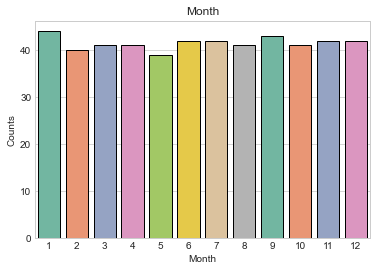

In [23]:
plt.style.use("seaborn-whitegrid")
sns.countplot(data["Month"], edgecolor="black", palette="Set2")
plt.title("Month")
plt.xlabel("Month")
plt.ylabel("Counts");

**Interpretations**

- Overall month 1 i.e is January has highest count .

**Year**

In [52]:
year_df=data.groupby("Year")[['Sales Volume','Sales Value']].sum().round(2)
year_df

,Sales Volume,Sales Value
Year,,
2018,10325,12473478.65
2019,10035,11789819.31
2020,9199,10501418.74


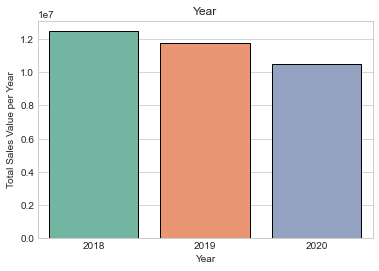

In [25]:
plt.style.use("seaborn-whitegrid")
sns.barplot(x=year_df.index,y=year_df["Sales Value"], edgecolor="black",palette="Set2" )
plt.title("Year")
plt.xlabel("Year")
plt.ylabel("Total Sales Value per Year");

**SUBTYPE**

Rectangle(xy=(-0.25, 0), width=0.5, height=574, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=10, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=11039, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=11566, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=4026, angle=0)
Rectangle(xy=(4.75, 0), width=0.5, height=2344, angle=0)


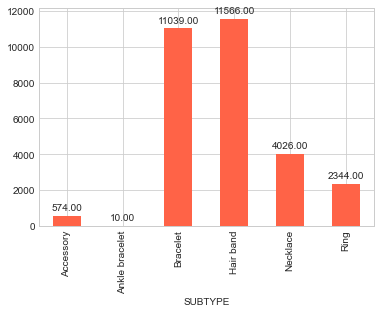

In [26]:
ax=data.groupby(by="SUBTYPE")['Sales Volume'].sum().plot(kind='bar', color="tomato")

for bar in ax.patches:
    print(bar)


for bar in ax.patches:
    
    plt.annotate(format(bar.get_height(), '0.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')


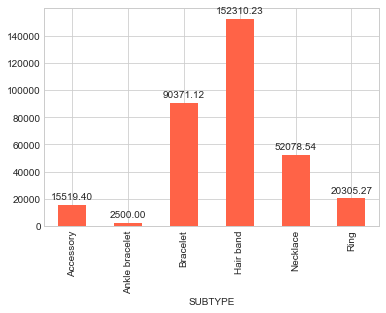

In [27]:
ax=data.groupby(by="SUBTYPE")['Sales Value'].mean().plot(kind='bar', color="tomato")



for bar in ax.patches:
    
    plt.annotate(format(bar.get_height(), '0.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

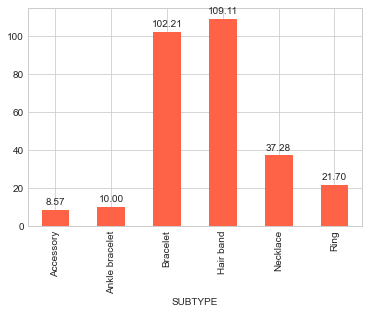

In [28]:
ax=data.groupby(by="SUBTYPE")['Sales Volume'].mean().plot(kind='bar', color="tomato")



for bar in ax.patches:
    
    plt.annotate(format(bar.get_height(), '0.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

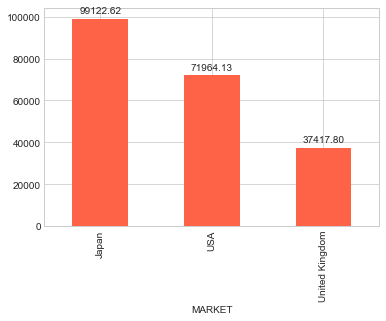

In [29]:
ax=data.groupby(by="MARKET")['Sales Value'].mean().plot(kind='bar', color="tomato")



for bar in ax.patches:
    
    plt.annotate(format(bar.get_height(), '0.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

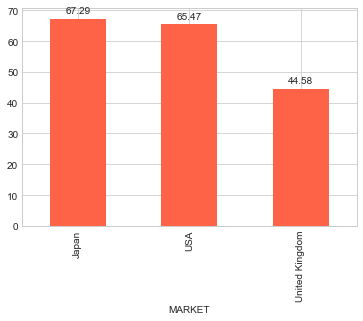

In [30]:
ax=data.groupby(by="MARKET")['Sales Volume'].mean().plot(kind='bar', color="tomato")



for bar in ax.patches:
    
    plt.annotate(format(bar.get_height(), '0.2f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

**Interpretations**

- Overall time-period the number of Hair band sold is maximum.

- Over 3 years period the number of ankle bracelete sold is minimum i.e only 10.




**Sales Volume**

In [31]:
data.describe()

,Year,Month,Sales Volume,Sales Value
count,498.000000,498.000000,498.000000,4.980000e+02
mean,2019.044177,6.512048,59.355422,6.980867e+04
std,0.818582,3.472348,75.491816,1.032926e+05
min,2018.000000,1.000000,-1.000000,-1.679717e+05
25%,2018.000000,3.250000,13.000000,1.389833e+04
50%,2019.000000,7.000000,27.000000,3.272126e+04
75%,2020.000000,9.750000,81.000000,8.713739e+04
max,2020.000000,12.000000,610.000000,1.011205e+06


In [32]:
data.head()

,MARKET,Year,Month,SUBTYPE,Sales Volume,Sales Value
0,Japan,2018,1,Bracelet,10,10280.47
1,Japan,2018,1,Ring,19,21850.04
2,Japan,2018,1,Necklace,23,36795.41
3,Japan,2018,1,Accessory,0,0.00
4,Japan,2018,1,Hair band,322,492215.54


In [33]:
Quaters=[]

for i in data["Month"]:
    if i<=4:
        Quaters.append('Q1')
    elif i>4 and i<=8:
        Quaters.append('Q2')
    else:
        Quaters.append('Q3')

In [34]:
data["Quaters"]=Quaters

In [35]:
data.head()

,MARKET,Year,Month,SUBTYPE,Sales Volume,Sales Value,Quaters
0,Japan,2018,1,Bracelet,10,10280.47,Q1
1,Japan,2018,1,Ring,19,21850.04,Q1
2,Japan,2018,1,Necklace,23,36795.41,Q1
3,Japan,2018,1,Accessory,0,0.00,Q1
4,Japan,2018,1,Hair band,322,492215.54,Q1


**Interpretations**
 - We have divided the whole into 3 Quaters namely Q1, Q2, Q3, as we have to do furter analysis on quater basis

In [36]:
# Table A

table_A=data.groupby(['Year','Month'])[['Sales Value', 'Sales Volume']].mean()
table_A

Sales Value  Sales Volume
Year Month                             
2018 1       75196.470667     61.333333
     2       90567.792308     73.923077
     3       75708.736429     63.214286
     4       60732.165714     53.357143
     5       81426.871667     63.583333
     6      112120.612500     85.916667
     7       69847.109231     58.000000
     8       74190.802500     63.916667
     9      106219.332308     88.000000
     10      57455.571667     48.916667
     11      60929.993077     53.000000
     12      98053.670000     82.846154
2019 1       62472.415714     54.071429
     2       81972.981667     72.833333
     3       79065.622500     72.500000
     4       63512.450000     53.666667
     5       77496.646667     65.583333
     6      118371.420000     88.866667
     7       68554.796667     57.266667
     8       62156.149333     52.866667
     9       82001.402000     72.866667
     10      44882.122143     40.000000
     11      48242.745714     42.642857
     12      72902.029286     62.000000
2020 1       52984.918000     44.733333
     2       68807.832000     54.333333
     3       63188.684667     53.000000
     4       28438.416667     42.200000
     5       70678.519333     60.533333
     6       96420.378000     82.266667
     7       68796.122857     61.000000
     8       55930.959286     50.357143
     9       76794.413333     63.733333
     10      37360.079333     33.400000
     11      44923.445333     39.600000
     12      44085.952667     35.533333

 **Interpretations**
 - Table_A shows the comparison of Sales value and volume on the basis of year and each month,
 - Here we will get an overview of the average sales and volume.

In [57]:
data.groupby('Quaters')[['Sales Value', 'Sales Volume']].mean().sort_values(by='Sales Value',ascending=False)

,Sales Value,Sales Volume
Quaters,,
Q2,79510.547073,65.780488
Q1,66180.874880,57.662651
Q3,63922.391369,54.755952


In [37]:
table_B=data.groupby(['SUBTYPE','Year','Quaters'])[['Sales Value', 'Sales Volume']].mean()
table_B

Sales Value  Sales Volume
SUBTYPE        Year Quaters                             
Accessory      2018 Q1         1427.731429      1.285714
                    Q2         1920.660000      1.000000
                    Q3         2422.440000      1.333333
               2019 Q1         2073.580000      1.000000
                    Q2        10854.956667      6.000000
                    Q3        12555.751111      7.111111
               2020 Q1        17693.536667      9.583333
                    Q2        25788.217500     14.083333
                    Q3        23666.066667     13.000000
Ankle bracelet 2018 Q1         2500.000000     10.000000
Bracelet       2018 Q1        60142.828333     69.666667
                    Q2        67600.420833     73.166667
                    Q3        60868.809167     71.500000
               2019 Q1        86193.855000     99.666667
                    Q2        98729.851667    107.833333
                    Q3        83482.477500     96.916667
               2020 Q1        78316.304167    114.500000
                    Q2       165032.543333    178.416667
                    Q3       112973.012500    108.250000
Hair band      2018 Q1       204434.295833    145.833333
                    Q2       173432.810833    121.833333
                    Q3       202956.426667    151.416667
               2019 Q1       145257.858333    105.666667
                    Q2       209789.860833    142.416667
                    Q3       140222.943333    101.166667
               2020 Q1       103916.974167     71.000000
                    Q2       102793.540000     73.100000
                    Q3        79734.596667     63.583333
Necklace       2018 Q1        60318.723333     47.750000
                    Q2        77016.335833     55.500000
                    Q3        52611.178333     41.083333
               2019 Q1        42345.800000     32.250000
                    Q2        44545.070000     32.250000
                    Q3        43307.208333     31.083333
               2020 Q1        58541.112500     36.916667
                    Q2        66417.058333     43.416667
                    Q3        23604.344167     15.250000
Ring           2018 Q1        25354.725000     27.916667
                    Q2        25196.365833     25.666667
                    Q3        27716.792500     27.083333
               2019 Q1        23292.429167     24.333333
                    Q2        27643.604167     27.333333
                    Q3        19770.356667     25.333333
               2020 Q1         8306.886667     10.833333
                    Q2        11489.448333     11.583333
                    Q3        13976.843333     15.250000

**Interpretations**
 - Table_B shows the comparison of Sales value and volume on the basis of each  year per Quater of each Subtype category,
 - which is helping us to know which category has maximum sales per quater each year.

In [54]:
table_C=data.groupby(['MARKET','Year','Quaters'])[['Sales Value', 'Sales Volume']].mean().round(2)
table_C

Sales Value  Sales Volume
MARKET         Year Quaters                           
Japan          2018 Q1         129816.01         88.29
                    Q2         114690.82         75.88
                    Q3         129946.32         90.81
               2019 Q1         101825.60         71.50
                    Q2         131885.80         85.53
                    Q3          93378.59         65.80
               2020 Q1          75064.28         47.85
                    Q2          74456.68         49.50
                    Q3          57100.59         41.75
USA            2018 Q1          64966.83         57.14
                    Q2          93260.89         77.00
                    Q3          77350.95         70.79
               2019 Q1          74674.31         68.83
                    Q2          79267.40         73.16
                    Q3          57128.62         53.70
               2020 Q1          53670.56         59.45
                    Q2          87907.31         76.60
                    Q3          63900.21         55.65
United Kingdom 2018 Q1          35795.86         45.11
                    Q2          43773.97         49.50
                    Q3          36768.54         43.69
               2019 Q1          37242.45         47.62
                    Q2          34436.02         39.84
                    Q3          32014.90         42.82
               2020 Q1          31330.05         38.40
                    Q2          55854.60         65.50
                    Q3          31372.12         31.80

**Interpretations**
 - Table_C shows the comparison of Sales value and volume on the basis of each  year per Quater of each market.
 - which is helping us to know avrege sales and volume per year each quater market-wise.

# Task 4

## chart 1

Text(0.5, 1.0, 'Distribution of Sales Value')

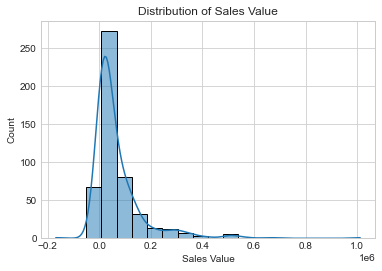

In [39]:
sns.histplot(data["Sales Value"], kde=True, bins=20)
plt.xlabel("Sales Value")
plt.title("Distribution of Sales Value")

Text(0.5, 1.0, 'Distribution of Sales Volume')

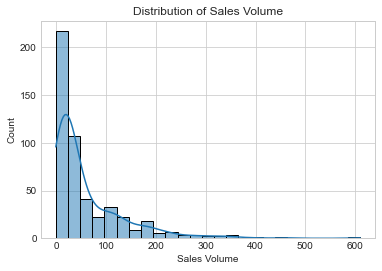

In [40]:
sns.histplot(data["Sales Volume"], kde=True, bins=25)
plt.xlabel("Sales Volume")
plt.title("Distribution of Sales Volume")

## chart 2

In [41]:
market=list(data['MARKET'].unique())

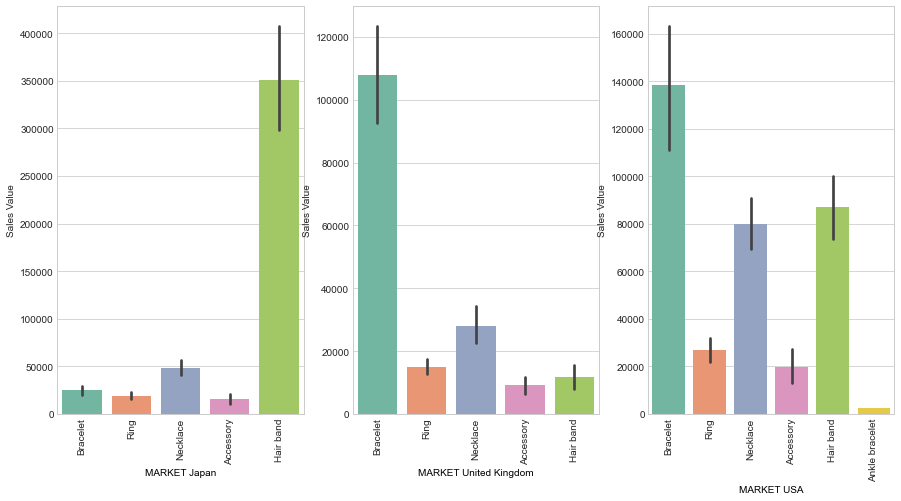

In [42]:
num=1
plt.figure(figsize=(15,7.5))

for i in market:
    plt.subplot(1,3,num)
    dffil=data[data["MARKET"]==i]
    sns.barplot(x="SUBTYPE", y="Sales Value",data=dffil, palette="Set2",hue_order=data['SUBTYPE'].unique())

    plt.xlabel(f"MARKET {i}", fontdict={"color":"black", "size": 10})
    plt.xticks(rotation=90)
    num+=1

**Interpretations**
- sales of hair bands is maximum in japan market and minumum in UK market.

- sales of Necklace is maximum in USA market and minumum in japan market.
- Ankle bracelets is only sold in USA market.
- Sales of bracelets is lowest in JAPAN market. 
- overall sales of accessery is lowest in JAPAN and UK market.
- maximum rings are sold in USA market.

# Chart 3

In [43]:
table_C=data.groupby(['MARKET','Year','Month'])[['Sales Value', 'Sales Volume']].mean().round(2)
uk_data = data[(data['MARKET'] == 'United Kingdom') & (data['Year'] == 2020)]
uk_2020 = uk_data.groupby('Month').sum()

In [44]:
uk_data = data[(data['MARKET'] == 'United Kingdom') & (data['Year'] == 2020)]
uk_20 = uk_data.groupby('Month').sum()


In [45]:
uk_data2 = data[(data['MARKET'] == 'United Kingdom') & (data['Year'] == 2019)]
uk_19 = uk_data2.groupby('Month').sum()

In [46]:
uk_data3 = data[(data['MARKET'] == 'United Kingdom') & (data['Year'] == 2018)]
uk_18 = uk_data3.groupby('Month').sum()

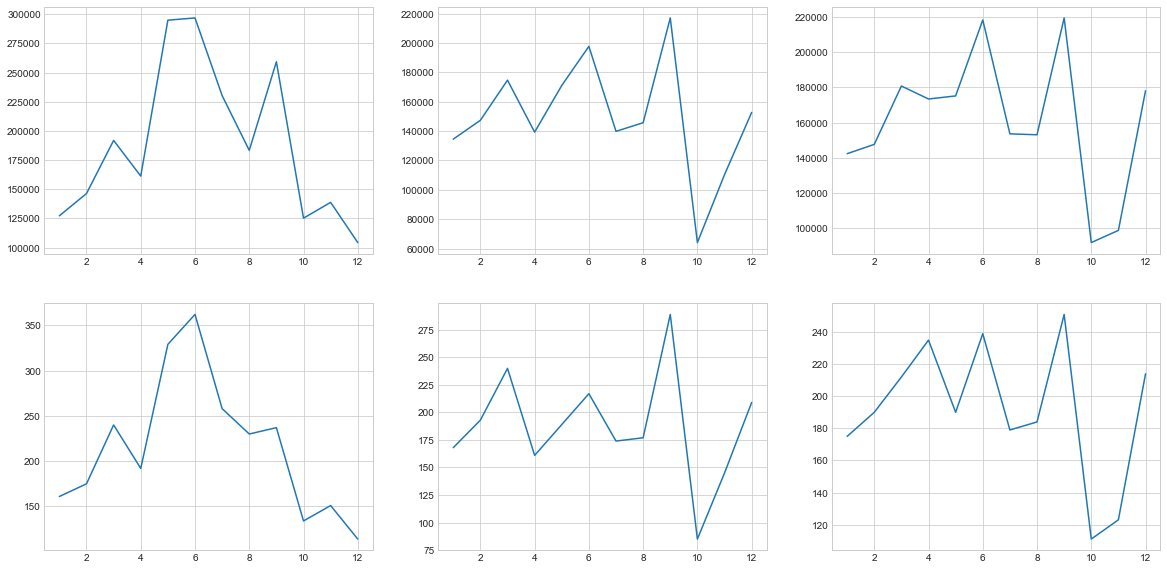

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(uk_20['Sales Value'])

plt.subplot(2,3,2)
plt.plot(uk_19['Sales Value'])

plt.subplot(2,3,3)
plt.plot(uk_18['Sales Value'])

plt.subplot(2,3,4)
plt.plot(uk_20['Sales Volume'])

plt.subplot(2,3,5)
plt.plot(uk_19['Sales Volume'])

plt.subplot(2,3,6)
plt.plot(uk_18['Sales Volume'])

In [48]:
data_2020 = data[(data['Year'] == 2020)]
data_20 =data_2020

In [49]:
market=list(data_20['MARKET'].unique())

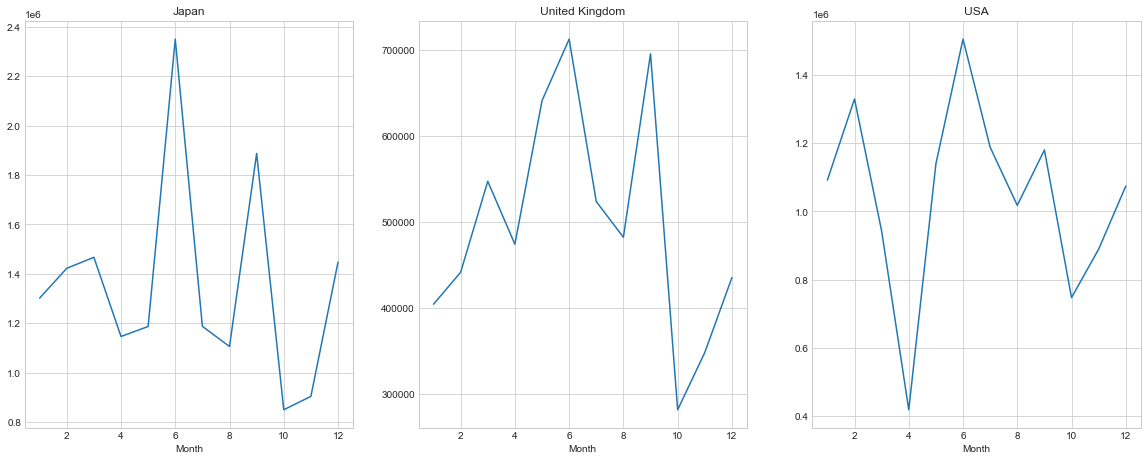

In [50]:
num=1
plt.figure(figsize=(20,7.5))

for i in market:
    plt.subplot(1,3,num)
    dffil=data[data["MARKET"]==i]
    df= dffil.groupby('Month').sum()
    plt.plot(df['Sales Value'])
    plt.xlabel('Month')
    plt.title(i)
    num+=1

**Interpretations**
- As you can see from the about trend the  campaign in UK 2020 dose't have the empect on salse as we expected. 
- from graph 1 of chart 3 before and after  campaign thaer is rapid fal in sales from 5 month.
- from graph 2  of chart 3 the sales trend of UK is less then japan and USA in 2020. 

### conclusion:

### Recommendation 